<a href="https://colab.research.google.com/github/ravi-murugesan/ftds6/blob/master/Energy_build1_GDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd 
train=pd.read_csv('/content/drive/My Drive/train.csv')
train.head(3)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import math

In [13]:
print(list(train.columns))
# train data is from 1 Jan 2016 to 31 Dec 2016, 
# meter reading of electricity(only elec for buiild_1), over an hour of teh day of teh year.
df_train = train[train['building_id'] == 1 ]
df_train.head(3)

['building_id', 'meter', 'timestamp', 'meter_reading']


,building_id,meter,timestamp,meter_reading
1,1,0,2016-01-01 00:00:00,0.0
2302,1,0,2016-01-01 01:00:00,0.0
4595,1,0,2016-01-01 02:00:00,0.0


In [14]:
df_train['timestamp'] = pd.to_datetime(df_train.timestamp)
df_train.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,building_id,meter,timestamp,meter_reading
1,1,0,2016-01-01 00:00:00,0.0
2302,1,0,2016-01-01 01:00:00,0.0
4595,1,0,2016-01-01 02:00:00,0.0


In [15]:
df_train['DOY'] = df_train['timestamp'].dt.dayofyear


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_train['Hour'] = df_train['timestamp'].dt.hour

df_train['HOD'] = df_train['Hour'].apply(lambda x: (x+1)*60*60)

seconds_in_day = 24*60*60
df_train['sin_time'] = np.sin(2*np.pi*df_train.HOD/seconds_in_day)
df_train['cos_time'] = np.cos(2*np.pi*df_train.HOD/seconds_in_day)

df_train.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,building_id,meter,timestamp,meter_reading,DOY,Hour,HOD,sin_time,cos_time
1,1,0,2016-01-01 00:00:00,0.0,1,0,3600,0.258819,0.965926
2302,1,0,2016-01-01 01:00:00,0.0,1,1,7200,0.500000,0.866025
4595,1,0,2016-01-01 02:00:00,0.0,1,2,10800,0.707107,0.707107


In [17]:
weather_train = pd.read_csv('/content/drive/My Drive/Energy/ashrae-energy-prediction/weather_train.csv')
weather_train.head(3)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0


In [18]:
df_weather_train = weather_train[weather_train['site_id'] == 0]
df_weather_train.head(3)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0


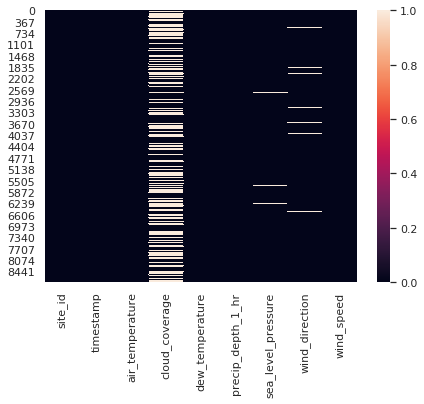

In [19]:
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(df_weather_train.isnull())

In [20]:
df_weather_train['timestamp'] = pd.to_datetime(df_weather_train.timestamp)
df_weather_train.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0


In [21]:
df_weather_train.columns

Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

In [22]:
df_w = df_weather_train[['timestamp', 'air_temperature',
       'dew_temperature', 'precip_depth_1_hr',
       'wind_direction', 'wind_speed']]
df_w.head(3)


,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,wind_direction,wind_speed
0,2016-01-01 00:00:00,25.0,20.0,NaN,0.0,0.0
1,2016-01-01 01:00:00,24.4,21.1,-1.0,70.0,1.5
2,2016-01-01 02:00:00,22.8,21.1,0.0,0.0,0.0


In [23]:
null_data = df_w[df_w.isnull().any(axis=1)]
null_data.shape

(254, 6)

In [0]:
df_w1 = df_w.interpolate()


In [25]:
null_data = df_w1[df_w1.isnull().any(axis=1)]
null_data

,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,wind_direction,wind_speed
0,2016-01-01,25.0,20.0,NaN,0.0,0.0


In [26]:
df_w1 = df_w1.fillna(value=0)
df_w1.isnull().any()

timestamp            False
air_temperature      False
dew_temperature      False
precip_depth_1_hr    False
wind_direction       False
wind_speed           False
dtype: bool

In [27]:
df_w1 = df_w1.reset_index()
df_w1.head(3)

,index,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,20.0,0.0,0.0,0.0
1,1,2016-01-01 01:00:00,24.4,21.1,-1.0,70.0,1.5
2,2,2016-01-01 02:00:00,22.8,21.1,0.0,0.0,0.0


In [0]:
df_train = df_train.reset_index()

In [29]:
df_train1 = df_train.drop('index',axis=1)
df_train1.head(3)

,building_id,meter,timestamp,meter_reading,DOY,Hour,HOD,sin_time,cos_time
0,1,0,2016-01-01 00:00:00,0.0,1,0,3600,0.258819,0.965926
1,1,0,2016-01-01 01:00:00,0.0,1,1,7200,0.500000,0.866025
2,1,0,2016-01-01 02:00:00,0.0,1,2,10800,0.707107,0.707107


In [0]:
df_train1 = df_train1.reset_index()

In [31]:
df_train1.head()

,index,building_id,meter,timestamp,meter_reading,DOY,Hour,HOD,sin_time,cos_time
0,0,1,0,2016-01-01 00:00:00,0.0,1,0,3600,0.258819,0.965926
1,1,1,0,2016-01-01 01:00:00,0.0,1,1,7200,0.500000,0.866025
2,2,1,0,2016-01-01 02:00:00,0.0,1,2,10800,0.707107,0.707107
3,3,1,0,2016-01-01 03:00:00,0.0,1,3,14400,0.866025,0.500000
4,4,1,0,2016-01-01 04:00:00,0.0,1,4,18000,0.965926,0.258819


In [32]:
df_w1.shape,df_train1.shape

((8784, 7), (8784, 10))

In [33]:
df_com = pd.merge(df_w1,df_train1, on='index')
df_com.head(3)

,index,timestamp_x,air_temperature,dew_temperature,precip_depth_1_hr,wind_direction,wind_speed,building_id,meter,timestamp_y,meter_reading,DOY,Hour,HOD,sin_time,cos_time
0,0,2016-01-01 00:00:00,25.0,20.0,0.0,0.0,0.0,1,0,2016-01-01 00:00:00,0.0,1,0,3600,0.258819,0.965926
1,1,2016-01-01 01:00:00,24.4,21.1,-1.0,70.0,1.5,1,0,2016-01-01 01:00:00,0.0,1,1,7200,0.500000,0.866025
2,2,2016-01-01 02:00:00,22.8,21.1,0.0,0.0,0.0,1,0,2016-01-01 02:00:00,0.0,1,2,10800,0.707107,0.707107


In [34]:
df_com.shape

(8784, 16)

In [35]:
df_com1 = df_com[df_com['meter_reading'] <= 200]
df_com1.shape

(8780, 16)

In [36]:
df_com1.columns

Index(['index', 'timestamp_x', 'air_temperature', 'dew_temperature',
       'precip_depth_1_hr', 'wind_direction', 'wind_speed', 'building_id',
       'meter', 'timestamp_y', 'meter_reading', 'DOY', 'Hour', 'HOD',
       'sin_time', 'cos_time'],
      dtype='object')

In [0]:
df_com2 = df_com1[['air_temperature', 'dew_temperature',
       'precip_depth_1_hr', 'wind_direction', 'wind_speed', 'meter_reading', 'DOY', 'sin_time', 'cos_time']]

In [49]:
df_com2.head(3)

,air_temperature,dew_temperature,precip_depth_1_hr,wind_direction,wind_speed,meter_reading,DOY,sin_time,cos_time,sin_dire,cos_dire
0,25.0,20.0,0.0,0.0,0.0,0.0,1,0.258819,0.965926,0.000000,1.00000
1,24.4,21.1,-1.0,70.0,1.5,0.0,1,0.500000,0.866025,0.939693,0.34202
2,22.8,21.1,0.0,0.0,0.0,0.0,1,0.707107,0.707107,0.000000,1.00000


In [39]:
df_com2['wind_direction'].describe()

count    8780.000000
mean      156.760820
std       117.621639
min         0.000000
25%        60.000000
50%       140.000000
75%       260.000000
max       360.000000
Name: wind_direction, dtype: float64

In [40]:
# df_com1['Hour'] = df_train['timestamp'].dt.hour

# df_train['HOD'] = df_train['Hour'].apply(lambda x: (x+1)*60*60)

# seconds_in_day = 24*60*60

df_com2['sin_dire'] = np.sin(2*np.pi*df_com2.wind_direction/360)
df_com2['cos_dire'] = np.cos(2*np.pi*df_com2.wind_direction/360)

df_com2.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,air_temperature,dew_temperature,precip_depth_1_hr,wind_direction,wind_speed,meter_reading,DOY,sin_time,cos_time,sin_dire,cos_dire
0,25.0,20.0,0.0,0.0,0.0,0.0,1,0.258819,0.965926,0.000000,1.00000
1,24.4,21.1,-1.0,70.0,1.5,0.0,1,0.500000,0.866025,0.939693,0.34202


In [41]:
df_com3 = df_com2.drop('wind_direction',axis=1)
df_com3.head(3)

,air_temperature,dew_temperature,precip_depth_1_hr,wind_speed,meter_reading,DOY,sin_time,cos_time,sin_dire,cos_dire
0,25.0,20.0,0.0,0.0,0.0,1,0.258819,0.965926,0.000000,1.00000
1,24.4,21.1,-1.0,1.5,0.0,1,0.500000,0.866025,0.939693,0.34202
2,22.8,21.1,0.0,0.0,0.0,1,0.707107,0.707107,0.000000,1.00000


In [50]:
df_com3.head(3)

,air_temperature,dew_temperature,precip_depth_1_hr,wind_speed,meter_reading,DOY,sin_time,cos_time,sin_dire,cos_dire
0,25.0,20.0,0.0,0.0,0.0,1,0.258819,0.965926,0.000000,1.00000
1,24.4,21.1,-1.0,1.5,0.0,1,0.500000,0.866025,0.939693,0.34202
2,22.8,21.1,0.0,0.0,0.0,1,0.707107,0.707107,0.000000,1.00000


In [0]:
write1 = df_com3.to_csv('/content/drive/My Drive/train_clean.csv')
# # !cp data.csv drive/My\ Drive/

In [3]:
import pandas as pd 
df_com3=pd.read_csv('/content/drive/My Drive/train_clean.csv')
df_com3.head(3)

,Unnamed: 0,air_temperature,dew_temperature,precip_depth_1_hr,wind_speed,meter_reading,DOY,sin_time,cos_time,sin_dire,cos_dire
0,0,25.0,20.0,0.0,0.0,0.0,1,0.258819,0.965926,0.000000,1.00000
1,1,24.4,21.1,-1.0,1.5,0.0,1,0.500000,0.866025,0.939693,0.34202
2,2,22.8,21.1,0.0,0.0,0.0,1,0.707107,0.707107,0.000000,1.00000


In [6]:
df_com = df_com3.drop('Unnamed: 0',axis=1)
df_com.head(3)

,air_temperature,dew_temperature,precip_depth_1_hr,wind_speed,meter_reading,DOY,sin_time,cos_time,sin_dire,cos_dire
0,25.0,20.0,0.0,0.0,0.0,1,0.258819,0.965926,0.000000,1.00000
1,24.4,21.1,-1.0,1.5,0.0,1,0.500000,0.866025,0.939693,0.34202
2,22.8,21.1,0.0,0.0,0.0,1,0.707107,0.707107,0.000000,1.00000


In [7]:
x_train = df_com.drop('meter_reading',axis=1)
y_train = df_com['meter_reading']

x_train.shape,y_train.shape

((8780, 9), (8780,))

In [8]:
poly_f = PolynomialFeatures(degree = 5)
x_train_poly = poly_f.fit_transform(x_train)

# print(x_train_poly)
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)

# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_train, poly_reg.predict(poly_f.transform(x_train))): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_train, poly_reg.predict(poly_f.transform(x_train)))) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_train, poly_reg.predict(poly_f.transform(x_train))):.2f}')

Mean squared error: 272.86
Root Mean squared error: 16.52
Variance score: 0.93


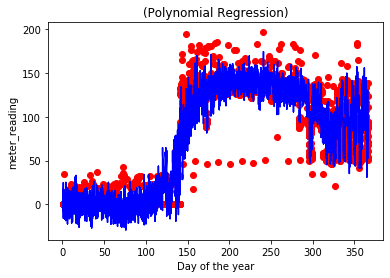

In [9]:
plt.scatter(df_com3['DOY'], df_com3['meter_reading'], color = 'red')
plt.plot(df_com3['DOY'], poly_reg.predict(poly_f.transform(x_train)), color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Day of the year')
plt.ylabel('meter_reading')
plt.show()

In [0]:
# GDBoost regressor

GDBoost Reg

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=200, learning_rate=0.25,
                                max_depth=7, random_state=42, loss='ls').fit(x_train_poly, y_train)
mean_squared_error(y_train, est.predict(x_train_poly))

# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_train, est.predict(x_train_poly)): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_train, est.predict(x_train_poly))) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_train, est.predict(x_train_poly)):.2f}')

Mean squared error: 1.43
Root Mean squared error: 1.20
Variance score: 1.00


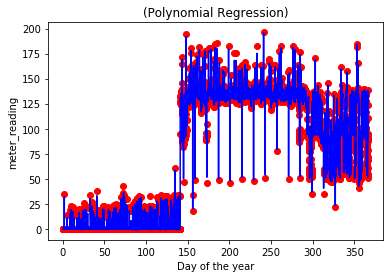

In [12]:
plt.scatter(df_com['DOY'], df_com['meter_reading'], color = 'red')
plt.plot(df_com['DOY'], est.predict(x_train_poly), color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Day of the year')
plt.ylabel('meter_reading')
plt.show()